DATA PRE PROCESSING

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [140]:
df = pd.read_csv('titanic_train.csv')

In [141]:
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [142]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
# df.isnull will provide the entire dataset as true or false while df.isnull.sum will provide if there are any null values in that attribute
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [144]:
#inplace = true will not return the dataset which contains the dropped value while false willl print the dataset
df.dropna(inplace=True)

In [145]:
#To save a DataFrame to a CSV file without the index, we can use the to_csv() method with the index parameter set to False 
df.to_csv('titanic2_train',index = False)

In [146]:
df['Embarked'].value_counts()

Embarked
S    116
C     65
Q      2
Name: count, dtype: int64

To Comapre How Sex Affects the survival Rate

In [147]:
df['Sex'].value_counts()

Sex
male      95
female    88
Name: count, dtype: int64

In [148]:
df.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,60,60,60,60,60,60,60,60,60,60,60
1,123,123,123,123,123,123,123,123,123,123,123


In [149]:
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,88,88,88,88,88,88,88,88,88,88,88
male,95,95,95,95,95,95,95,95,95,95,95


In [150]:
df.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                   6       6     6    6      6      6       6     6   
       1                  82      82    82   82     82     82      82    82   
male   0                  54      54    54   54     54     54      54    54   
       1                  41      41    41   41     41     41      41    41   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6         6  
       1            82        82  
male   0            54        54  
       1            41        41

In [151]:
survived_df = df[df['Survived']==1]

In [152]:
by_sex = survived_df['Sex'].value_counts()

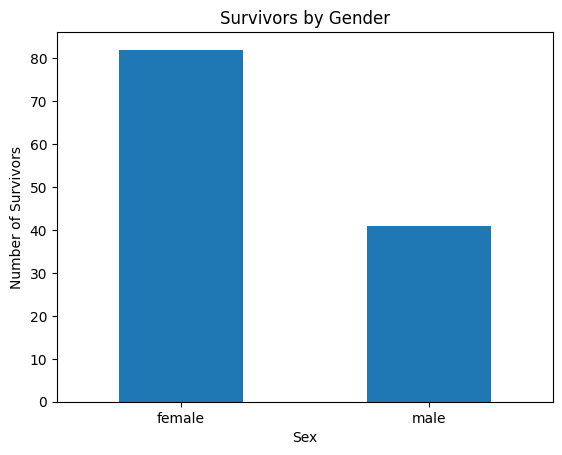

In [153]:
by_sex.plot(kind='bar', rot=0)
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Survivors by Gender')
plt.show()

To Check How Passenger Class affects the survival rate

In [154]:
df.groupby(['Pclass','Survived','Sex']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived Sex                                                          
1      0        female            3     3    3      3      3       3     3   
                male             49    49   49     49     49      49    49   
       1        female           71    71   71     71     71      71    71   
                male             35    35   35     35     35      35    35   
2      0        female            1     1    1      1      1       1     1   
                male              2     2    2      2      2       2     2   
       1        female            8     8    8      8      8       8     8   
                male              4     4    4      4      4       4     4   
3      0        female            2     2    2      2      2       2     2   
                male              3     3    3      3      3       3     3   
       1        female            3     3    3      3      3       3     3   
                male              2     2    2      2      2       2     2   

                        Cabin  Embarked  
Pclass Survived Sex                      
1      0        female      3         3  
                male       49        49  
       1        female     71        71  
                male       35        35  
2      0        female      1         1  
                male        2         2  
       1        female      8         8  
                male        4         4  
3      0        female      2         2  
                male        3         3  
       1        female      3         3  
                male        2         2

In [155]:
df.groupby(['Survived','Embarked']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Survived Embarked                                                              
0        C                  17      17    17   17   17     17     17      17   
         Q                   1       1     1    1    1      1      1       1   
         S                  42      42    42   42   42     42     42      42   
1        C                  48      48    48   48   48     48     48      48   
         Q                   1       1     1    1    1      1      1       1   
         S                  74      74    74   74   74     74     74      74   

                   Fare  Cabin  
Survived Embarked               
0        C           17     17  
         Q            1      1  
         S           42     42  
1        C           48     48  
         Q            1      1  
         S           74     74

In [156]:
by_Embarked=survived_df['Embarked'].value_counts()

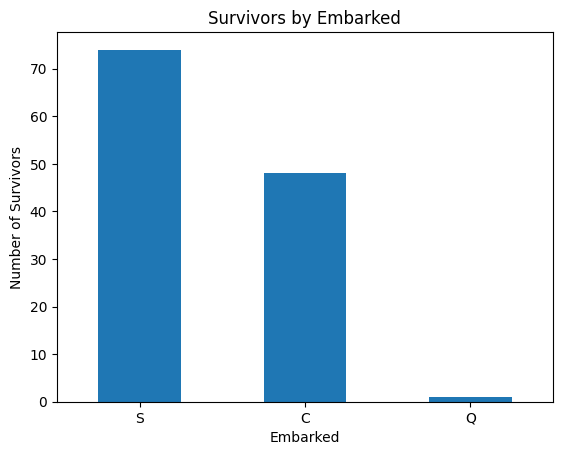

In [157]:
by_Embarked.plot(kind='bar', rot=0)
plt.xlabel('Embarked')
plt.ylabel('Number of Survivors')
plt.title('Survivors by Embarked')
plt.show()

In [158]:
by_class=survived_df['Pclass'].value_counts()

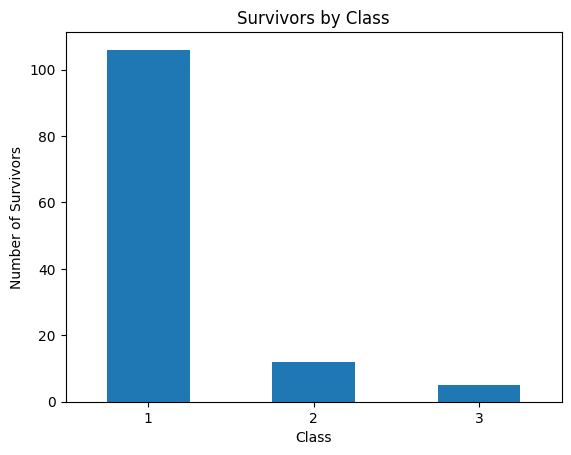

In [159]:
by_class.plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Number of Survivors')
plt.title('Survivors by Class')
plt.show()

*Comparing by Age*

In [160]:
survivors = df[df['Survived'] == 1]
non_survived = df[df['Survived'] == 0]

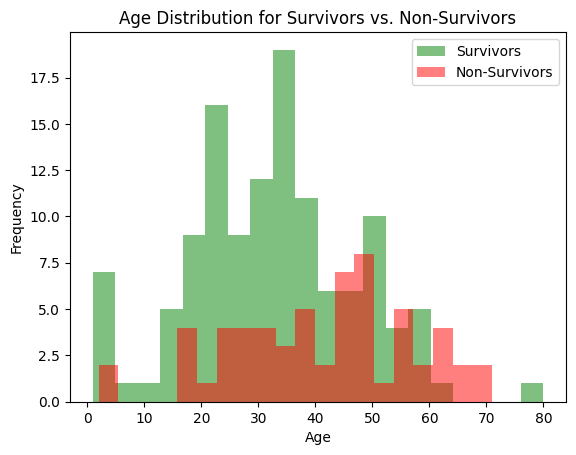

In [161]:
#plotting histogram
plt.hist(survivors['Age'], bins=20, alpha=0.5, label='Survivors', color='green')
plt.hist(non_survived['Age'], bins=20, alpha=0.5, label='Non-Survivors', color='red')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Survivors vs. Non-Survivors')
plt.legend()

plt.show()

C:\Users\Pratham\AppData\Local\Temp\ipykernel_24392\3817457353.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival_rate = df.groupby('Age Group')['Survived'].mean()


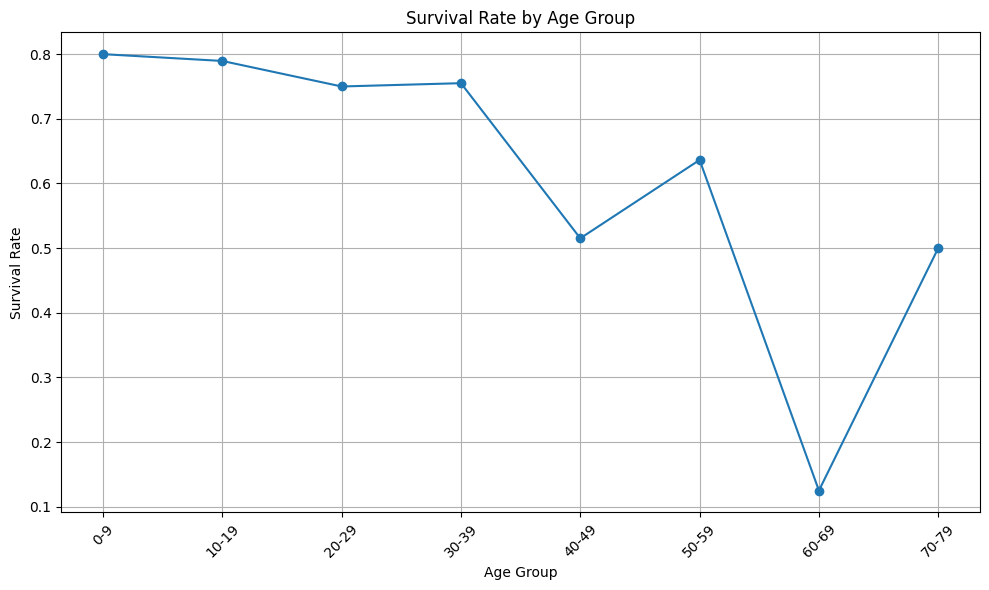

In [162]:
age_bins = range(0, 101, 10)
age_labels = [f'{start}-{start+9}' for start in age_bins[:-1]]

# Assign each row to an age group
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate the survival rate within each age group
age_group_survival_rate = df.groupby('Age Group')['Survived'].mean()

# Create a line graph
plt.figure(figsize=(10, 6))

plt.plot(age_group_survival_rate.index, age_group_survival_rate.values, marker='o', linestyle='-')

plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(True)
plt.tight_layout()

plt.show()

#NAHI SAMJA BC

*Splitting data in X and Y*


In [163]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50-59
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0-9
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,50-59


In [164]:
label_encoder = LabelEncoder()

# Fit the label encoder to the gender column of the dataset.
label_encoder.fit(df['Sex'])

# Use the label encoder to transform the gender column to numeric values.
df['Sex'] = label_encoder.transform(df['Sex'])

**X = Sex, Pclass, Age**
**Y = Survived**

In [165]:
y = df['Survived']
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [166]:
x = df.drop(['Survived','Name','Age Group','Fare','PassengerId','Parch','SibSp','Ticket','Cabin','Embarked'], axis = 1)

**SPLITTING DATA TO TRAINING AND TESTING**

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=100)

In [169]:
x_test

,Pclass,Sex,Age
66,2,0,29.0
765,1,0,51.0
96,1,1,71.0
356,1,0,22.0
263,1,1,40.0
311,1,0,18.0
835,1,0,39.0
730,1,0,29.0
194,1,0,44.0
806,1,1,39.0


**MODEL BUILDING**

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [173]:
scaler = StandardScaler()

In [174]:
X_train_Scaled = scaler.fit_transform(x_train)

In [175]:
X_test_Scaled = scaler.fit_transform(x_test)

In [176]:
log_reg=LogisticRegression(random_state=0).fit(X_train_Scaled, y_train)

In [177]:
log_reg.predict(X_train_Scaled)

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [178]:
log_reg.score(X_train_Scaled, y_train)

0.7945205479452054

In [179]:
log_reg.score(X_test_Scaled, y_test)

0.7567567567567568